<a href="https://colab.research.google.com/github/Saify-Technologies/simple-linear-regression-jax-pytorch-tensorflow/blob/main/simple_sgd_jax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
from PIL import Image
import jax

In [ ]:
n = 100 # total number of points
x = jnp.ones(shape=(n,2));x[:5]


DeviceArray([[1., 1.],
             [1., 1.],
             [1., 1.],
             [1., 1.],
             [1., 1.]], dtype=float32)

In [ ]:
x_ = jnp.linspace(-1, 1, num=100); x_.shape

(100,)

In [ ]:
x = x.at[:,0].set(x_) 

In [ ]:
x

DeviceArray([[-1.        ,  1.        ],
             [-0.97979796,  1.        ],
             [-0.9595959 ,  1.        ],
             [-0.939394  ,  1.        ],
             [-0.91919196,  1.        ],
             [-0.8989899 ,  1.        ],
             [-0.8787879 ,  1.        ],
             [-0.85858583,  1.        ],
             [-0.8383838 ,  1.        ],
             [-0.81818175,  1.        ],
             [-0.79797983,  1.        ],
             [-0.7777778 ,  1.        ],
             [-0.75757575,  1.        ],
             [-0.7373737 ,  1.        ],
             [-0.71717167,  1.        ],
             [-0.69696975,  1.        ],
             [-0.6767677 ,  1.        ],
             [-0.65656567,  1.        ],
             [-0.6363636 ,  1.        ],
             [-0.6161616 ,  1.        ],
             [-0.59595966,  1.        ],
             [-0.5757575 ,  1.        ],
             [-0.5555556 ,  1.        ],
             [-0.53535354,  1.        ],
             [-0

In [ ]:
x.shape

(100, 2)

In [ ]:
a  = jnp.array([3,2]);a.shape

(2,)

In [ ]:
seed=1
key = jax.random.PRNGKey(seed)

In [ ]:
y = x@a + 0.75*np.random.rand(n);y.shape

(100,)

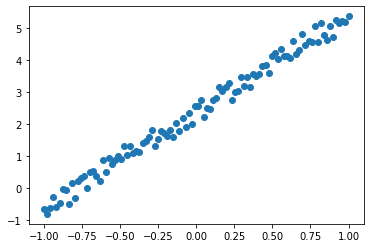

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], y);

In [ ]:
global a 
a = jnp.array([-.5,.5])
ypred = x@a
x.shape,a[0],x[0,0]

((100, 2), DeviceArray(-0.5, dtype=float32), DeviceArray(-1., dtype=float32))

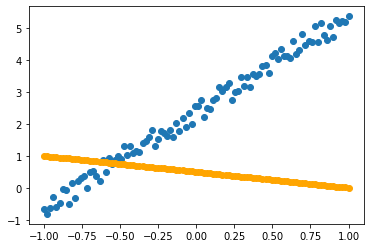

In [ ]:
plt.scatter(x[:,0], y);
plt.scatter(x[:,0], ypred,c="orange");

In [ ]:
ypred,x[:,1]

(DeviceArray([1.        , 0.989899  , 0.97979796, 0.969697  , 0.959596  ,
              0.94949496, 0.93939394, 0.9292929 , 0.9191919 , 0.9090909 ,
              0.8989899 , 0.8888889 , 0.8787879 , 0.86868685, 0.85858583,
              0.8484849 , 0.83838385, 0.82828283, 0.8181818 , 0.8080808 ,
              0.79797983, 0.78787875, 0.7777778 , 0.7676768 , 0.75757575,
              0.7474748 , 0.7373737 , 0.72727275, 0.7171717 , 0.7070707 ,
              0.6969697 , 0.68686867, 0.6767677 , 0.6666666 , 0.65656567,
              0.64646465, 0.6363636 , 0.62626266, 0.6161616 , 0.6060606 ,
              0.5959596 , 0.5858586 , 0.57575756, 0.56565654, 0.5555556 ,
              0.5454545 , 0.53535354, 0.5252525 , 0.5151515 , 0.50505054,
              0.49494952, 0.4848485 , 0.47474748, 0.46464646, 0.45454544,
              0.44444442, 0.43434346, 0.42424244, 0.41414142, 0.4040404 ,
              0.39393938, 0.38383836, 0.3737374 , 0.36363637, 0.35353535,
              0.34343433, 0.3333333 , 

In [ ]:
def mse(ypred,y):
  return jnp.mean((ypred - y)**2);

a.shape

(2,)

In [ ]:
mse(ypred,y)

DeviceArray(7.775197, dtype=float32)

In [ ]:
def model(x,a):
  return x@a

In [ ]:
def grad_func(y,x,a):
  return mse(model(x,a),y)

In [ ]:
%time loss,grad = jax.value_and_grad(grad_func,argnums=(2))(y,x,a)
loss, grad

CPU times: user 144 ms, sys: 5.66 ms, total: 149 ms
Wall time: 410 ms


(DeviceArray(7.775197, dtype=float32),
 DeviceArray([-2.3793318, -3.7814476], dtype=float32))

In [ ]:
lr = 1e-1
def update():
  global a
  loss,grad = jax.value_and_grad(grad_func,argnums=(2))(y,x,a)    
  if t%10 == 0 : print(loss)
  a -= lr*grad

In [ ]:
def loop():
  for t in range(100):
     update()

In [ ]:
%time loop()

CPU times: user 634 ms, sys: 79 ms, total: 713 ms
Wall time: 1.16 s


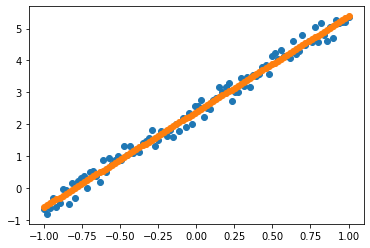

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],model(x,a));

In [ ]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

a = jnp.array([-100.,.1])

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)